# 1. Adding Necessary Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for graphs

In [78]:
#Handling Warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Reading and Understanding Data

In [79]:
#Reading CSV to a Dataframe
car = pd.read_csv(r'C:\Users\PINAKI\Desktop\upgrad\Linear Regression\CarPrice_Assignment.csv', low_memory=False)

#Head of dataframe
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [80]:
#Shape of Dataframe
car.shape

(205, 26)

In [81]:
#Checking the number of entries in each column
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Finding: No missing values. All columns have 205 values each.
This will be analyzed more in Data Preparation Section

In [82]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 3. Data Preparation and EDA

### 3.1 Cleaning and Imputation

#### 3.1.1 Missing Values check

In [83]:
# Number of Rows with all missing values
car.isna().all(axis=1).sum()

0

In [84]:
# Number of Columns with all missing values
car.isna().all(axis=0).sum()

0

In [85]:
# Checking the Percentage of Missing values in the Column
print(100*(car.isna().sum()/len(car.index)))

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


##### Conclusions :
1. No Missing values in the data.
2. Missing value treatment is not necessary, So we are good to go to the next step.

#### 3.1.2 Checking for duplicate entries

In [86]:
# Number of unique entries in each coulumn
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

##### Observations:
1. Few Variables are categorical, which have very low unique values. There is nothing to be checked for duplicacy in thease columns.
2. Apart from the categorical variables, few other variables have less number of unique values than 205.
3. 'CarName' has 147 values, so it may have duplicate entries. If the same car has different prices, then it may affect our model in a negative way.

In [87]:
# list of columns to check uniqueness of the entry
col = car.columns

# Dropping 'price' and 'car_id'
col = list(set(col) - {'car_ID', 'price'})
print(col)

['drivewheel', 'peakrpm', 'symboling', 'horsepower', 'enginetype', 'cylindernumber', 'carbody', 'highwaympg', 'wheelbase', 'doornumber', 'carwidth', 'CarName', 'curbweight', 'stroke', 'carlength', 'aspiration', 'fueltype', 'boreratio', 'compressionratio', 'citympg', 'enginelocation', 'enginesize', 'fuelsystem', 'carheight']


In [88]:
# Checking if there is any duplicate rows
car[car.duplicated(col, keep=False)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


##### Conclusion:
1. No duplicate value found in data, when all the attributes are taken into account.

#### 3.1.3 Deriving Company from "CarName"

In [90]:
# Deriving company name
car['company'] = car['CarName'].str.split(pat = ' ', n=0, expand=True)[0]

# Deriving model name
car['model'] = car['CarName'].str.split(pat = ' ', n=0, expand=True)[1]

#### Checking for data issues in newly derived columns

In [91]:
# Checking for blank values in newly added columns
print(100*(car.isna().sum()/len(car.index)))

car_ID              0.00000
symboling           0.00000
CarName             0.00000
fueltype            0.00000
aspiration          0.00000
doornumber          0.00000
carbody             0.00000
drivewheel          0.00000
enginelocation      0.00000
wheelbase           0.00000
carlength           0.00000
carwidth            0.00000
carheight           0.00000
curbweight          0.00000
enginetype          0.00000
cylindernumber      0.00000
enginesize          0.00000
fuelsystem          0.00000
boreratio           0.00000
stroke              0.00000
compressionratio    0.00000
horsepower          0.00000
peakrpm             0.00000
citympg             0.00000
highwaympg          0.00000
price               0.00000
company             0.00000
model               0.97561
dtype: float64


##### Observation:
Few records in 'model' are blank, we can drop them as it will not be useful in analysis

In [92]:
# Replace blank values in 'model' with Nan
car['model'].replace('  ', np.nan, inplace=True)

# Dropping rows having blank values in 'model'
car= car.dropna(subset=['model'])

In [93]:
# Checking for null values
print(100*(car.isna().sum()/len(car.index)))

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
company             0.0
model               0.0
dtype: float64


##### Conclusion
Now we dont have any missing values in the data, we can move on to the next step.

In [94]:
# Converting all records in 'company' to lowercase
car['company'] = car['company'].str.lower()

In [95]:
# Checking the newly added 'company' columns
car['company'].value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
peugeot        11
volvo          11
subaru         10
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
vw              2
maxda           2
mercury         1
vokswagen       1
toyouta         1
porcshce        1
Name: company, dtype: int64

##### Observations:
we can observe few errors in the data
    1. company = vokswagen/volkswagen/vw
    2. company = toyota/toyouta
    3. company = subaru/saab
    4. company = porsche/porcshce
    5. company = mazda/maxda

In [96]:
# Replacing the error values with the proper values
car['company'] = car['company'].replace(['vokswagen', 'vw'], 'volkswagen')
car['company'] = car['company'].replace('toyouta', 'toyota')
car['company'] = car['company'].replace('saab', 'subaru')
car['company'] = car['company'].replace('porcshce', 'porsche')
car['company'] = car['company'].replace('maxda', 'mazda')

In [97]:
# Checking the update
car['company'].value_counts()

toyota         32
nissan         18
mazda          17
subaru         16
honda          13
mitsubishi     13
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: company, dtype: int64

##### Conclusions:
All the error values are replaced properly. We are good to go to the next step.

### 3.2 Analyzing the categorical variables

In this section we are looking at the dataset and noting down categorical variables and aanalyzing them.

In [98]:
# List of cateigorical variables
category = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'company']

 0    66
 1    54
 2    31
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


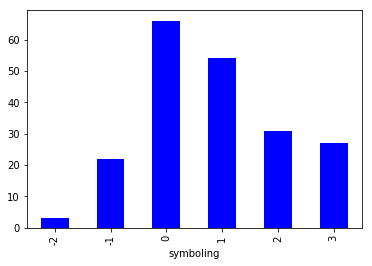

In [119]:
# Analyzing Symboling
print(car['symboling'].value_counts())

# Graphical view of the distribution
car.groupby('symboling')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. Symboling looks good, all values between -3 to 3.
2. '0' has maximum frequency
3. '-2' has very less frequency, but let's keep it in dataset not to loose much data.

gas       183
diesel     20
Name: fueltype, dtype: int64


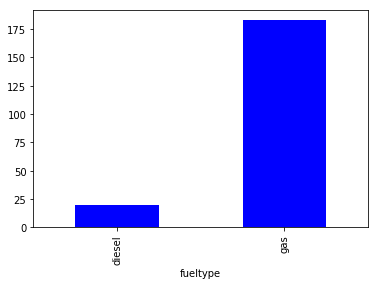

In [120]:
# Analyzing fueltype
print(car['fueltype'].value_counts())

# Graphical view of the distribution
car.groupby('fueltype')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. Fuel type looks good, no invalid entries.
2. 'gas' has maximum frequency

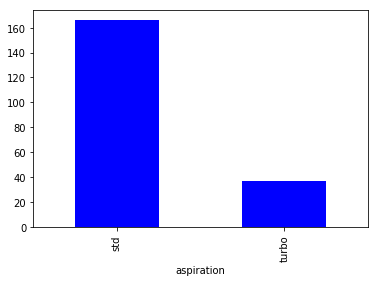

In [121]:
# Analyzing aspiration
car['aspiration'].value_counts()

# Graphical view of the distribution
car.groupby('aspiration')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. aspiration type looks good, no invalid entries.
2. 'std' has maximum frequency

four    114
two      89
Name: doornumber, dtype: int64


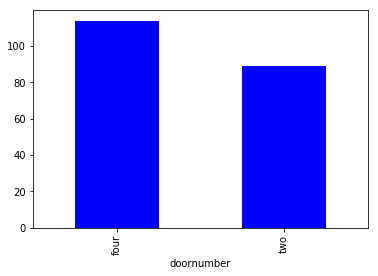

In [122]:
# Analyzing doornumber
print(car['doornumber'].value_counts())

# Graphical view of the distribution
car.groupby('doornumber')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. doornumber type looks good, no invalid entries.
2. 'four' has maximum frequency

sedan          95
hatchback      69
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


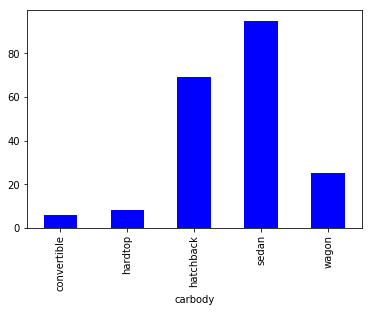

In [123]:
# Analyzing carbody
print(car['carbody'].value_counts())

# Graphical view of the distribution
car.groupby('carbody')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. carbody type looks good, no invalid entries.
2. 'sedan' has maximum frequency
3. hardtop and convertible has very less frequency, but let's keep them to prevent data loss.

fwd    118
rwd     76
4wd      9
Name: drivewheel, dtype: int64


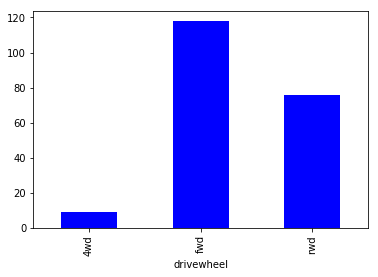

In [124]:
# Analyzing drivewheel
print(car['drivewheel'].value_counts())

# Graphical view of the distribution
car.groupby('drivewheel')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. drivewheel type looks good, no invalid entries.
2. 'fwd' has maximum frequency
3. 4wd has very less frequency, but let's keep it to prevent data loss.

front    200
rear       3
Name: enginelocation, dtype: int64


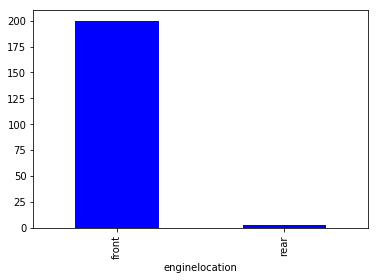

In [125]:
# Analyzing enginelocation
print(car['enginelocation'].value_counts())

# Graphical view of the distribution
car.groupby('enginelocation')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. enginelocation type looks good, no invalid entries.
2. The data is completely screwed, 'rear' has around 1% entries.
3. This column data will not be helpful for our analysis, so we can drop it.

In [126]:
# Dropping 'enginelocation' column
del car['enginelocation']

ohc      148
ohcv      13
ohcf      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


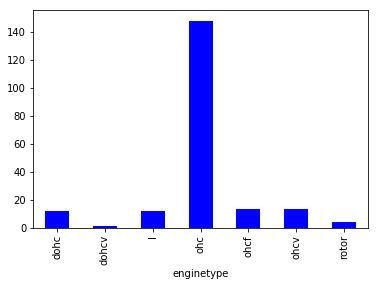

In [127]:
# Analyzing enginetype
print(car['enginetype'].value_counts())

# Graphical view of the distribution
car.groupby('enginetype')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. enginetype type looks good, no invalid entries.
2. 'ohc' has maximum frequency
3. 'dohcv' , 'rotor' has very less frequency. But no need to alter them, because we have very less entries.

four      157
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


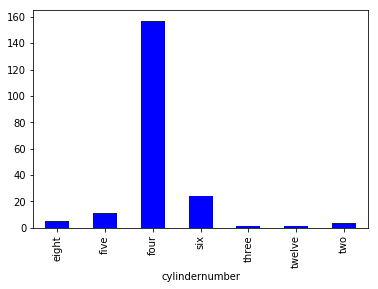

In [128]:
# Analyzing cylindernumber
print(car['cylindernumber'].value_counts())

# Graphical view of the distribution
car.groupby('cylindernumber')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. cylindernumber type looks good, no invalid entries.
2. 'four' has maximum frequency
3. 'eight' , 'twelve', 'two', 'three' have very less frequency. But no need to alter them, because we have very less entries.

mpfi    94
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


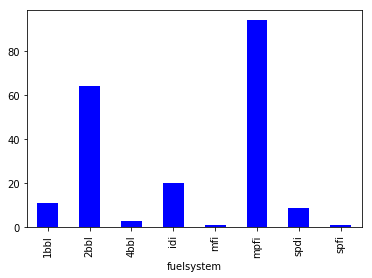

In [129]:
# Analyzing fuelsystem
print(car['fuelsystem'].value_counts())

# Graphical view of the distribution
car.groupby('fuelsystem')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. fuelsystem type looks good, no invalid entries.
2. 'mpfi' has maximum frequency
3. 'mfi' , 'spfi', '4bbl' have very less frequency. But no need to alter them, because we have very less entries.

toyota         32
nissan         18
mazda          17
subaru         16
honda          13
mitsubishi     13
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: company, dtype: int64


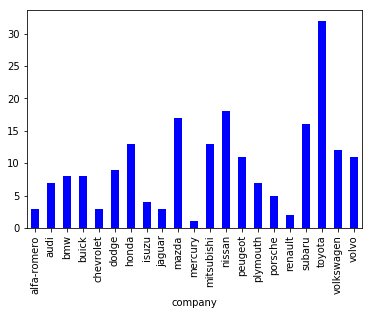

In [131]:
# Analyzing company
print(car['company'].value_counts())

# Graphical view of the distribution
car.groupby('company')['car_ID'].count().plot(kind='bar', color='blue')
plt.show()

##### Observations:
1. company type looks good, no invalid entries.
2. 'toyota' has maximum frequency
3. Many entries have very less frequency. But no need to alter them, because we have very less entries.

##### Coclusion
- Few of the categorical variables were not evenly distributed.
- But we decided not to alter the values, because after using dummies in the model, we will drop the less useful columns.
- Dropped 'enginelocation' as the column values were completely screwed. It won't be helpful for any analysis.

# 4. Visualizing Data

- Aim is to analyze the data for any interdependency or multicollinearity
- To identify if some predictors directly have a strong association with the outcome variable.

In [134]:
# importing seaborn for plots
import seaborn as sns

#### 4.1 Visualising Numeric Variables

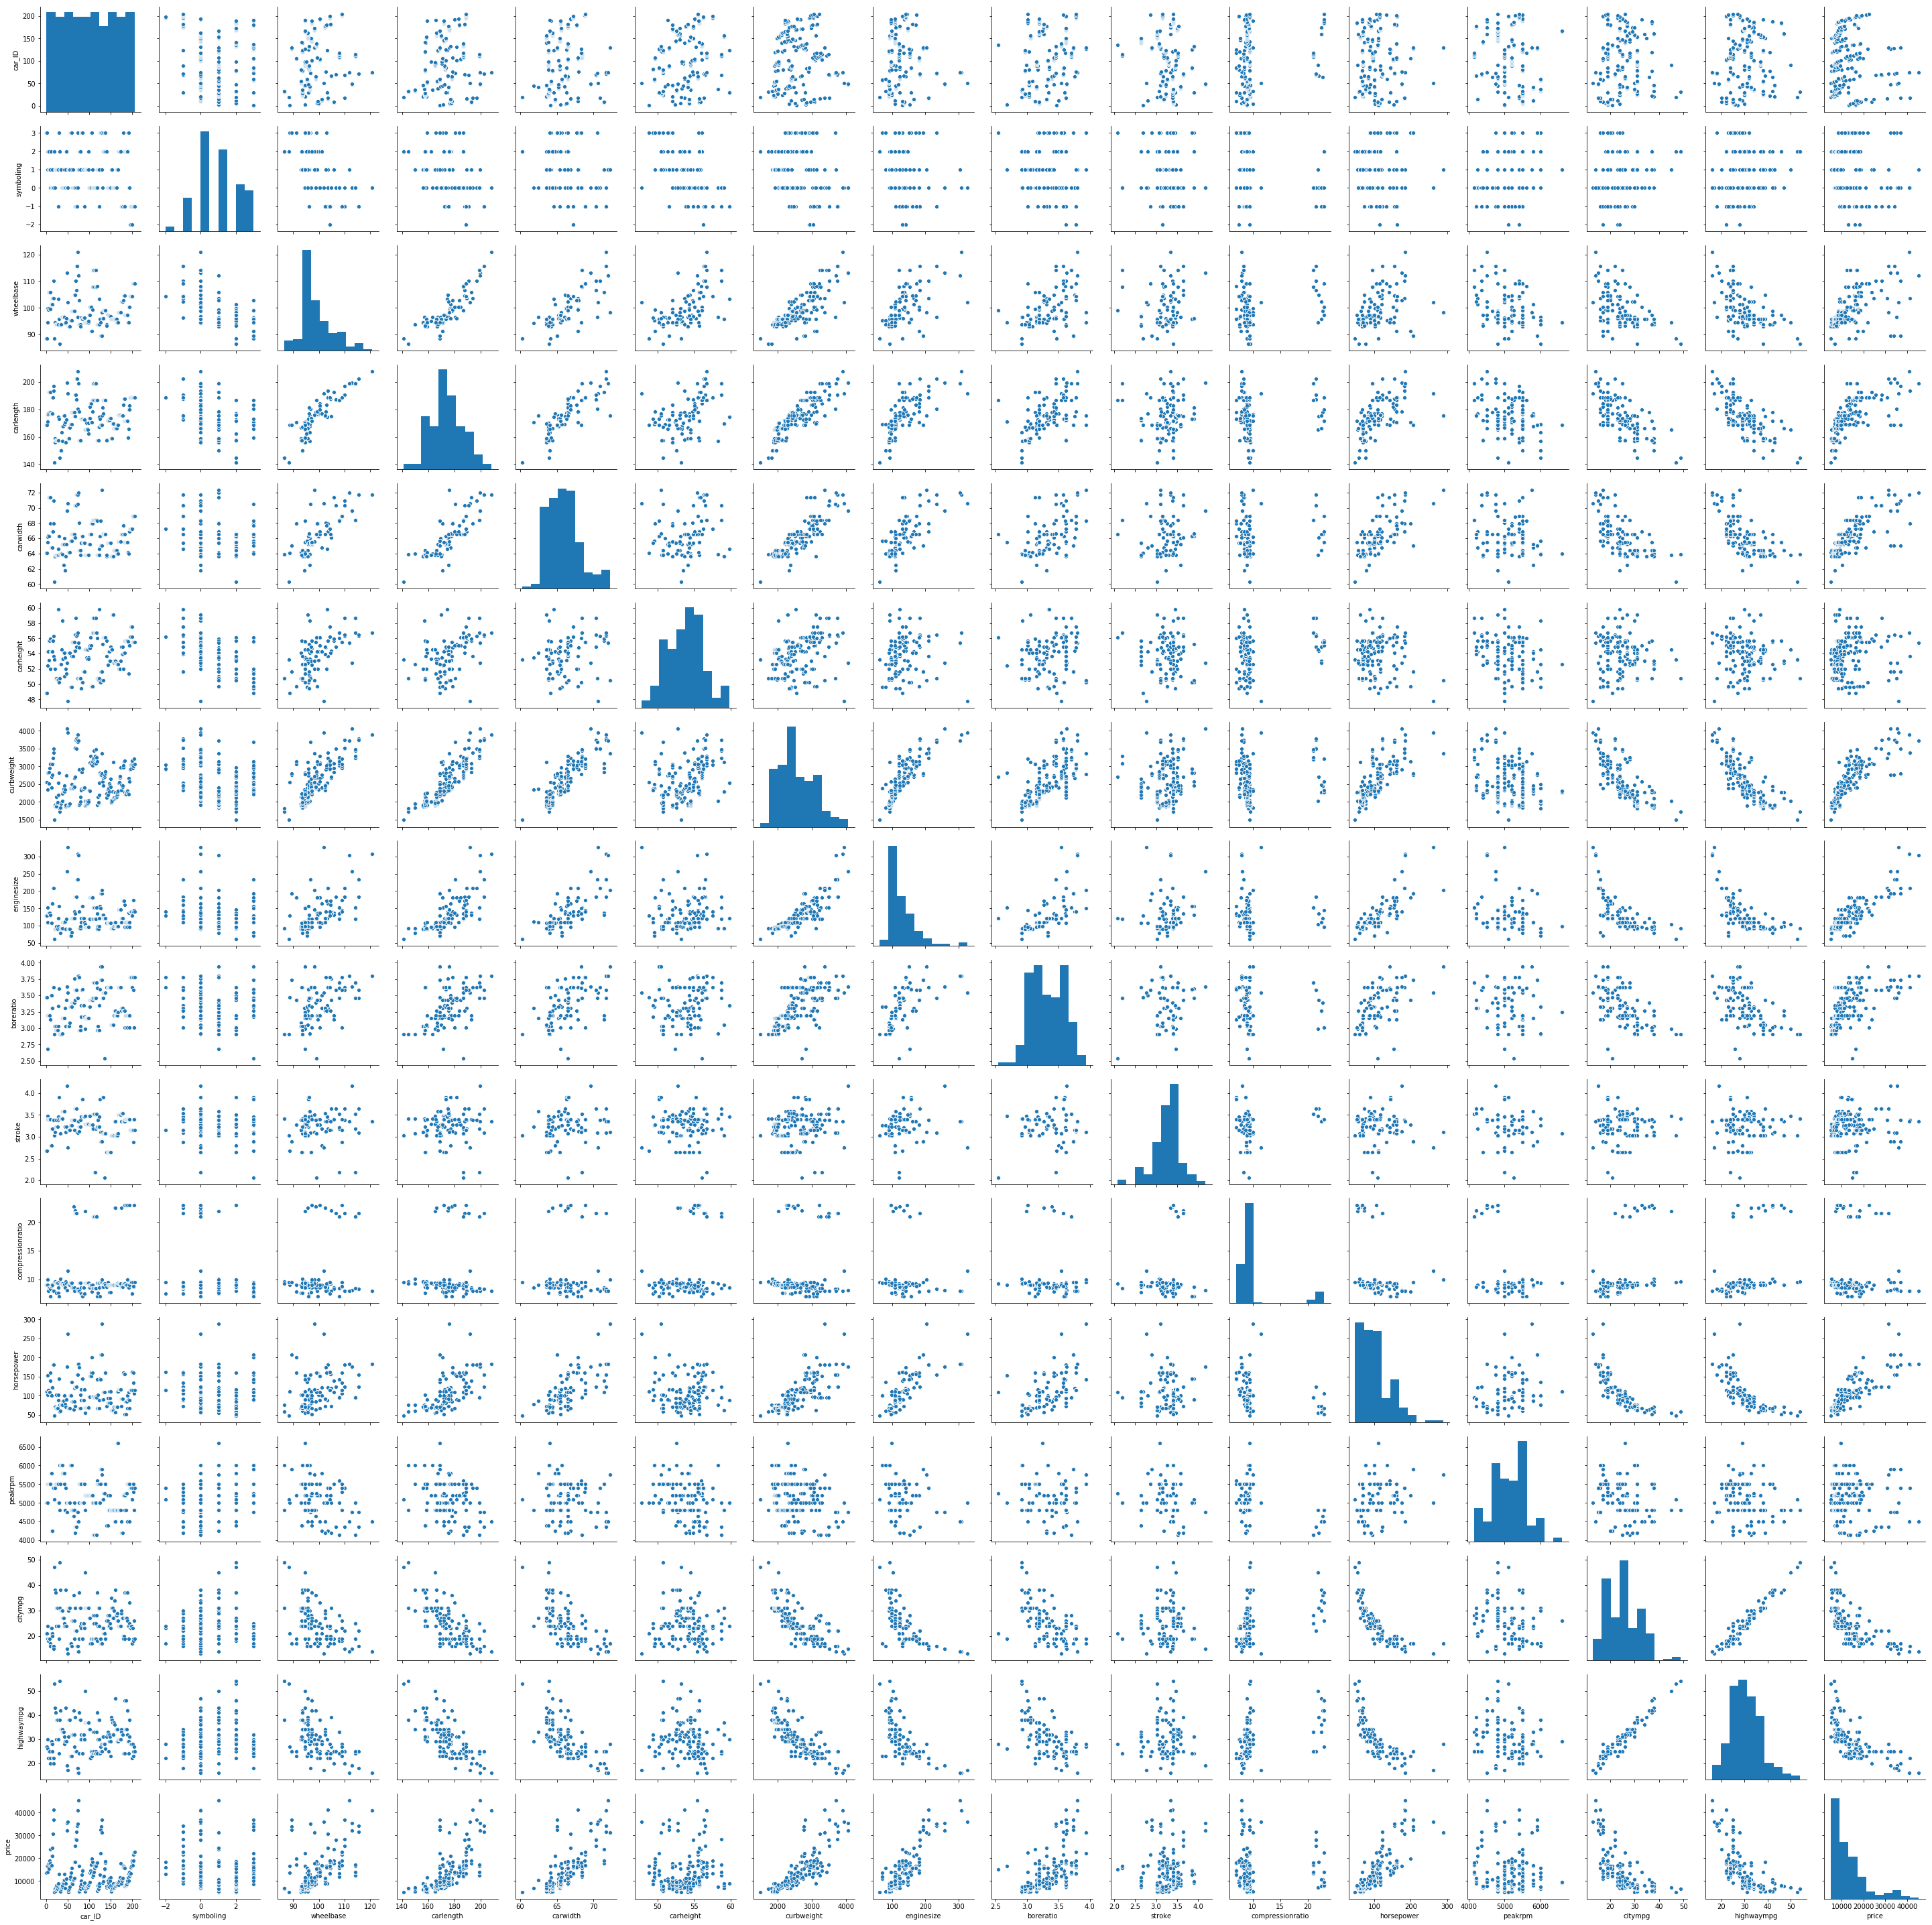

In [135]:
# Pairplot for numerical variables
sns.pairplot(car)
plt.show()

##### Observations
- we are able to see good relationship in the plot between various numerical values.
- We will check more in correlation test.
- Good relationship between 'price-wheelbase', 'price-carlength', 'price-carwidth', 'price-curbweight', 'price-horsepower' any few more. 

#### 4.1 Visualising Categorical Variables

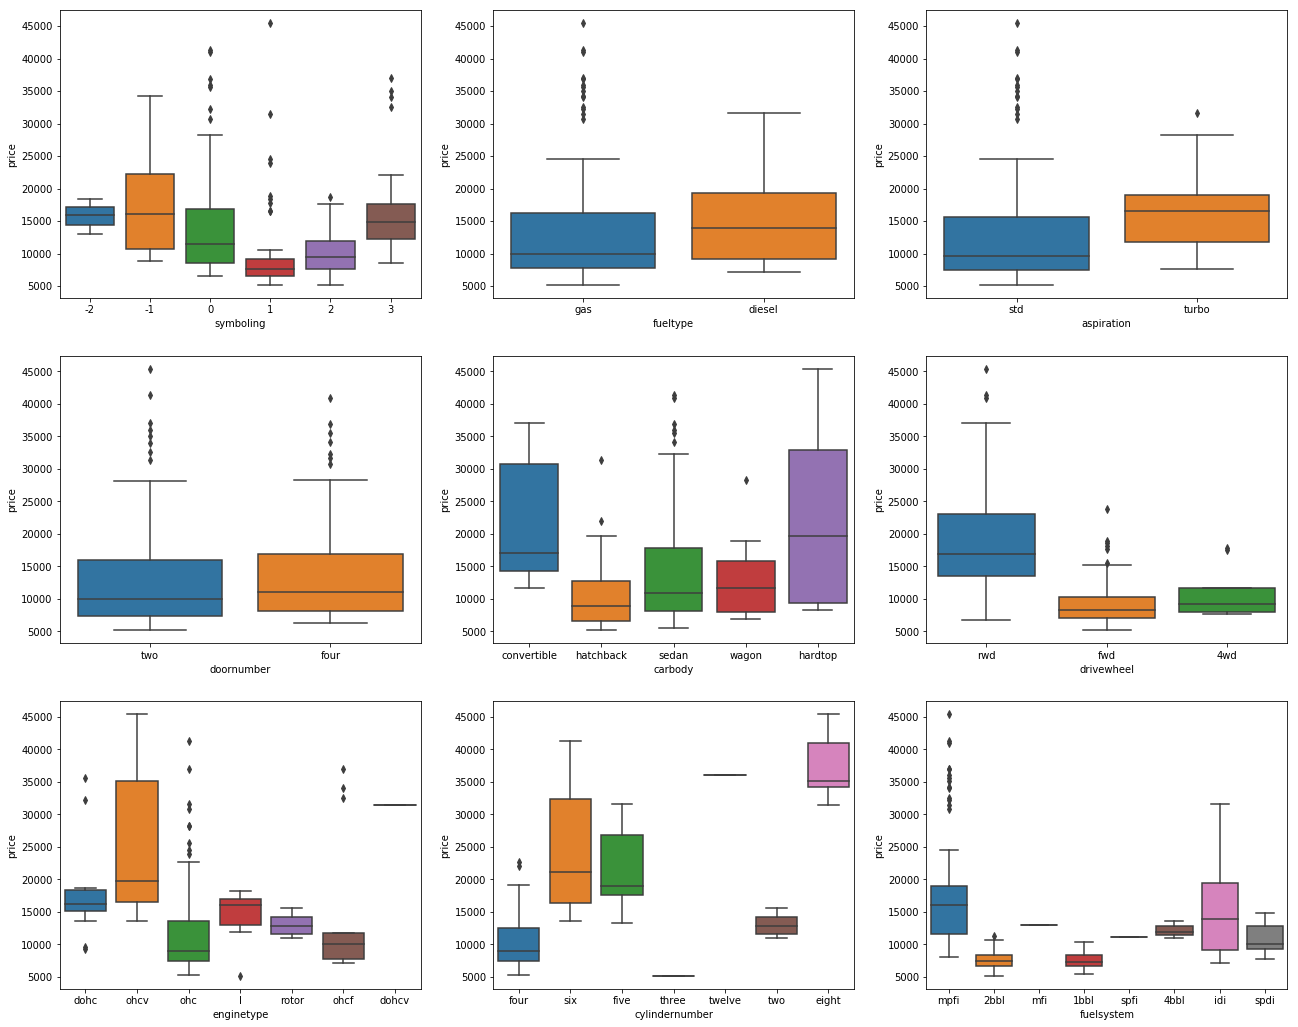

In [149]:
plt.figure(figsize=(22, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)

plt.show()

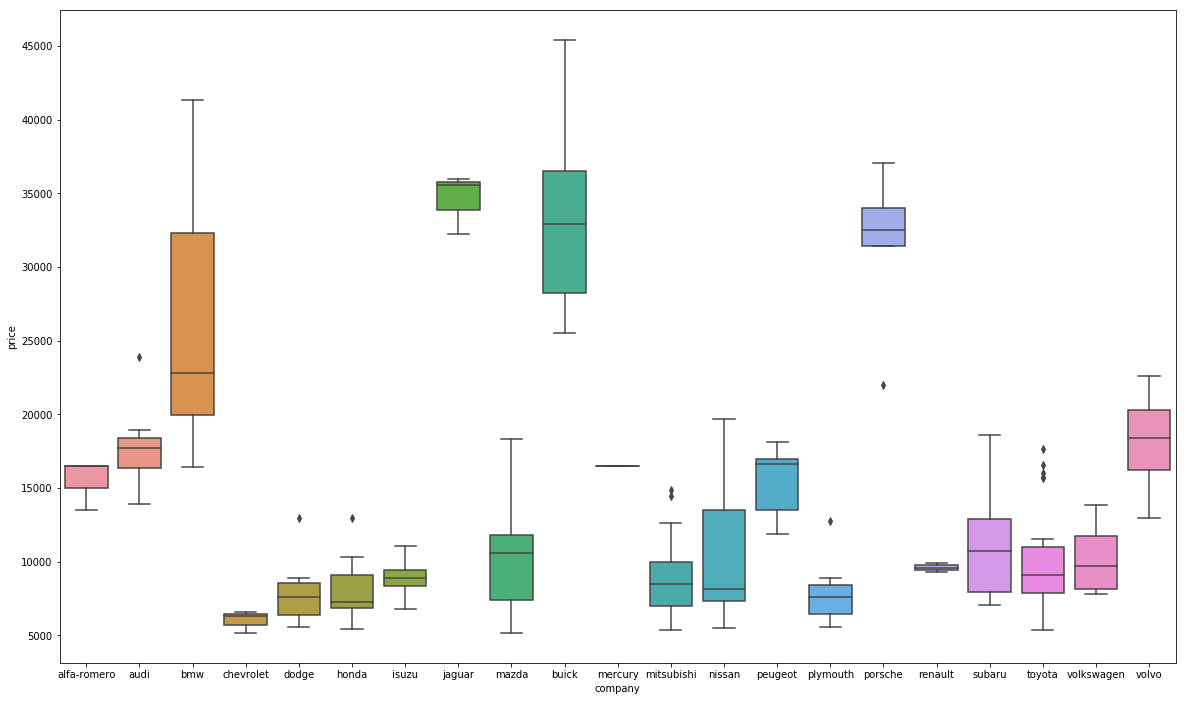

In [147]:
# Boxplot for company-price
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'company', y = 'price', data = car)
plt.show()

# 5. Creating dummy variables for categorical variables

- Aim is to convert the categorical variables to dummy variable for easier analysis

#### 5.1 Dummy for 'symboling'

In [172]:
# Get the dummy variables for the feature 'symboling' and store it in a new variable - 'symbol'
symbol = pd.get_dummies(car['symboling'])

# Add the results to the car dataframe
car = pd.concat([car, symbol], axis = 1)

In [173]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,highwaympg,price,company,model,-2,-1,0,1,2,3
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,27,13495.0,alfa-romero,giulia,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,27,16500.0,alfa-romero,stelvio,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,26,16500.0,alfa-romero,Quadrifoglio,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,30,13950.0,audi,100,0,0,0,0,1,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,22,17450.0,audi,100ls,0,0,0,0,1,0


#### 5.2 Dummy for 'fueltype'

In [174]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'fuel'
fuel = pd.get_dummies(car['fueltype'])

# Add the results to the car dataframe
car = pd.concat([car, fuel], axis = 1)

In [175]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,company,model,-2,-1,0,1,2,3,diesel,gas
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,alfa-romero,giulia,0,0,0,0,0,1,0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,alfa-romero,stelvio,0,0,0,0,0,1,0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,alfa-romero,Quadrifoglio,0,0,0,1,0,0,0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,audi,100,0,0,0,0,1,0,0,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,audi,100ls,0,0,0,0,1,0,0,1


#### 5.3 Dummy for 'aspiration'

In [176]:
# Get the dummy variables for the feature 'aspiration' and store it in a new variable - 'asp'
asp = pd.get_dummies(car['aspiration'])

# Add the results to the car dataframe
car = pd.concat([car, asp], axis = 1)

In [177]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,-2,-1,0,1,2,3,diesel,gas,std,turbo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,0,0,1,0,1,1,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,0,0,1,0,1,1,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,0,0,0,1,0,0,0,1,1,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,0,0,0,0,1,0,0,1,1,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,0,0,0,0,1,0,0,1,1,0


#### 5.4 Dummy for doornumber

In [178]:
# Get the dummy variables for the feature 'doornumber' and store it in a new variable - 'door'
door = pd.get_dummies(car['doornumber'])

# Add the results to the car dataframe
car = pd.concat([car, door], axis = 1)

In [179]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,0,1,2,3,diesel,gas,std,turbo,four,two
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,1,0,1,1,0,0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,1,0,1,1,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,0,1,0,0,0,1,1,0,0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,0,0,1,0,0,1,1,0,1,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,0,0,1,0,0,1,1,0,1,0


#### 5.5 Dummy for carbody

In [180]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'body'
body = pd.get_dummies(car['carbody'])

# Add the results to the car dataframe
car = pd.concat([car, body], axis = 1)

In [181]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,1,1,0,0,1,1,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,1,1,0,0,1,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,1,1,0,0,1,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,1,1,0,1,0,0,0,0,1,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,1,1,0,1,0,0,0,0,1,0


#### 5.5 Dummy for drivewheel

In [182]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drive'
drive = pd.get_dummies(car['drivewheel'])

# Add the results to the car dataframe
car = pd.concat([car, drive], axis = 1)

In [183]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,0,1,1,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,0,1,1,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,0,1,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,1,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,1,0,0,0,0,1,0,1,0,0


#### 5.6 Dummy for enginetype

In [184]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'etype'
etype = pd.get_dummies(car['enginetype'])

# Add the results to the car dataframe
car = pd.concat([car, etype], axis = 1)

In [185]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,1,1,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,1,1,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,0,0,1,0,0,0,0,0,1,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,1,0,0,0,0,0,1,0,0,0


#### 5.7 Dummy for cylindernumber

In [186]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'cnum'
cnum = pd.get_dummies(car['cylindernumber'])

# Add the results to the car dataframe
car = pd.concat([car, cnum], axis = 1)

In [187]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,0,1,0,0,0,0,1,0,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,0,0,0,0,0,1,0,0,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,0,0,0,0,1,0,0,0,0,0


#### 5.8 Dummy for fuelsystem

In [188]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'fsys'
fsys = pd.get_dummies(car['fuelsystem'])

# Add the results to the car dataframe
car = pd.concat([car, fsys], axis = 1)

In [189]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


#### 5.9 Dummy for company

In [190]:
# Get the dummy variables for the feature 'company' and store it in a new variable - 'comp'
comp = pd.get_dummies(car['company'])

# Add the results to the car dataframe
car = pd.concat([car, comp], axis = 1)

In [191]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,mitsubishi,nissan,peugeot,plymouth,porsche,renault,subaru,toyota,volkswagen,volvo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [194]:
# Checking the shape of dataframe
car.shape

(203, 90)

#### 5.10 Deleting existing columns as dummies are created

In [195]:
# Dropping the categorical columns as we have created the dummies for it
car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'company'
], axis = 1, inplace = True)

In [196]:
# Checking the head of Dataframe
car.head(5)

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,mitsubishi,nissan,peugeot,plymouth,porsche,renault,subaru,toyota,volkswagen,volvo
0,1,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,2,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,3,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,4,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,5,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


In [197]:
# shape of dataframe
car.shape

(203, 80)

##### Conclusion:
- We have created dummy variables for each categorical variables.
- Dropped the pre-existing categorical columns
- New shape of 'car' is (203,80)

# 6. Splitting dataframe into Training and test sets

- We need to split the dataframe into Train and test sets.
- Trainining set used for model building.
- Test set is used for model evaluation.
- We will also normalize the numerical variables to the same scale, process known as scaling.

#### 6.1 Tranin and Test Data sets

In [198]:
# dropping car_ID as it won't be useful for model building
car.drop(['car_ID'], axis = 1, inplace = True)

# Checking the shape
car.shape

(203, 79)

In [199]:
# importing sklearn
from sklearn.model_selection import train_test_split

In [323]:
# spliting train and test sets in 70-30 proportion
np.random.seed(0)
car_train, car_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [324]:
# Checking the shape of train and test set
print('car_train: ',  car_train.shape)
print('car_test: ',  car_test.shape)

car_train:  (142, 79)
car_test:  (61, 79)


#### 6.2 Rescaling the numeric features

- We will be using MinMax scaling to normalize the numerical columns

In [325]:
# importing sklearn minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [327]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['carwidth', 'enginesize', 'compressionratio', 'citympg', 'wheelbase','carheight','boreratio','horsepower','highwaympg','carlength','curbweight','stroke','peakrpm','price']

car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

In [328]:
# Checking the scaling
car_train.head(5)

,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mitsubishi,nissan,peugeot,plymouth,porsche,renault,subaru,toyota,volkswagen,volvo
1,alfa-romero stelvio,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
165,toyota celica gt liftback,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
140,subaru dl,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,...,0,0,0,0,0,0,1,0,0,0
136,saab 99gle,0.431034,0.739837,0.516667,0.734513,0.512025,0.226415,0.682540,0.444444,0.12500,...,0,0,0,0,0,0,1,0,0,0
190,vw rabbit,0.272414,0.400000,0.308333,0.318584,0.284329,0.181132,0.404762,0.611111,0.09375,...,0,0,0,0,0,0,0,0,1,0


In [329]:
# Dropping CarName and Model from train and train sets
car_train.drop(['CarName', 'model'], axis = 1, inplace = True)
car_test.drop(['CarName', 'model'], axis = 1, inplace = True)

In [330]:
# Checking the shape of train and test set
print('car_train: ',  car_train.shape)
print('car_test: ',  car_test.shape)

car_train:  (142, 77)
car_test:  (61, 77)


In [331]:
# Checking the train set
car_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mitsubishi,nissan,peugeot,plymouth,porsche,renault,subaru,toyota,volkswagen,volvo
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.412045,0.529154,0.466197,0.517201,0.413234,0.243263,0.501621,0.538128,0.203222,0.230810,...,0.063380,0.091549,0.056338,0.021127,0.021127,0.014085,0.098592,0.119718,0.077465,0.042254
std,0.205609,0.204078,0.183298,0.218653,0.209283,0.154919,0.210968,0.164123,0.257256,0.166599,...,0.244508,0.289410,0.231390,0.144316,0.144316,0.118257,0.299168,0.325781,0.268274,0.201879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.409756,0.308333,0.371681,0.248254,0.135849,0.293651,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.343103,0.505691,0.433333,0.557522,0.357642,0.184906,0.500000,0.555556,0.125000,0.195833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.475862,0.676423,0.543750,0.681416,0.557312,0.319811,0.706349,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Scaling looks good, let's proceed to the next step

#### 6.3 Checking the correlation before building model

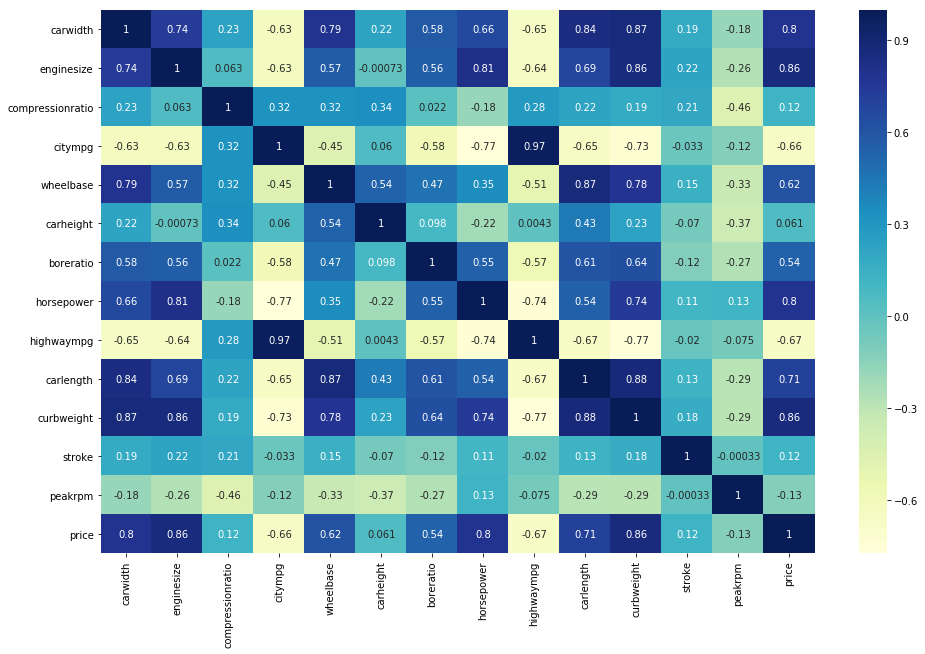

In [332]:
# Correlation between various numerical variables

plt.figure(figsize = (16, 10))
sns.heatmap(car_train[num_vars].corr(), annot = True, cmap="YlGnBu")

plt.draw()

- We can see good positive correlation of price with - 'carwidth', 'enginesize', 'horsepower', 'carlength' and 'curbweight'.
- Also there is strong negative correlation of price with - 'citympg', 'highwaympg'.

#### 6.4 Dividing dependent(Y) and independnt(X) variables

- 'price' feature is the dependednt variable here, the one we want to predict
- All other features are independednt or factors.

In [333]:
y_train = car_train.pop('price')
X_train = car_train

In [334]:
# Checking the shape of train and test set
print('y_train: ',  y_train.shape)
print('x_train: ',  X_train.shape)

y_train:  (142,)
x_train:  (142, 76)


# 7. Building linear model

- There are 76 features in the dataframe.
- It will be inefficient to build any icremental or decremental model.
- So best option here is to use RFE model for a predifed number of features.
- Later we will refine the the model using linear regression.

#### 7.1 RFE

- Looking at the dataframe, let's perform an RFE with 20 top variables affecting the price.
- Then we can either narrow it down or add more features

In [335]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [336]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [337]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 51),
 ('carlength', False, 56),
 ('carwidth', False, 48),
 ('carheight', False, 52),
 ('curbweight', False, 55),
 ('enginesize', False, 43),
 ('boreratio', False, 44),
 ('stroke', False, 46),
 ('compressionratio', False, 54),
 ('horsepower', False, 53),
 ('peakrpm', False, 47),
 ('citympg', False, 49),
 ('highwaympg', False, 50),
 (-2, False, 38),
 (-1, False, 42),
 (0, False, 39),
 (1, False, 40),
 (2, False, 41),
 (3, False, 37),
 ('diesel', False, 35),
 ('gas', False, 34),
 ('std', False, 32),
 ('turbo', False, 33),
 ('four', False, 31),
 ('two', False, 30),
 ('convertible', False, 4),
 ('hardtop', False, 2),
 ('hatchback', False, 23),
 ('sedan', False, 24),
 ('wagon', False, 25),
 ('4wd', False, 27),
 ('fwd', False, 26),
 ('rwd', False, 13),
 ('dohc', False, 14),
 ('dohcv', False, 9),
 ('l', False, 21),
 ('ohc', False, 16),
 ('ohcf', True, 1),
 ('ohcv', False, 19),
 ('rotor', False, 28),
 ('eight', True, 1),
 ('five', False, 18),
 ('four', False, 6),
 ('six', 

In [338]:
# columns considered for RFE
col = X_train.columns[rfe.support_]
col

Index(['ohcf', 'eight', 'six', 'twelve', '1bbl', 'spdi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'isuzu', 'jaguar', 'mazda', 'mitsubishi',
       'nissan', 'plymouth', 'porsche', 'renault', 'toyota', 'volkswagen'],
      dtype='object')

##### Comments:
- The output of the RFE is quite surprising.
- The variables affecting 'price' are mostly manufacturing companies.
- Let's analyze the linear model considering this outcome.

#### 7.1.2 Building Stasmodel using RFE O/P

In [339]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [340]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [341]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [261]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     37.48
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.27e-42
Time:                        19:12:42   Log-Likelihood:                 157.79
No. Observations:                 142   AIC:                            -273.6
Df Residuals:                     121   BIC:                            -211.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2877      0.017     17.315      0.0

In [342]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.27
6,spdi,2.83
14,mitsubishi,2.65
12,jaguar,1.83
3,six,1.67
2,eight,1.60
4,twelve,1.59
16,plymouth,1.58
8,buick,1.53
7,bmw,1.50


##### Observations:
- As we can see here the variables affecting the 'price' are the manufacturing companies.
- As 'Geely Auto' is to make a debut in US market, it should be interested with feature of the cars, not the company producing it.
- Even if the model looks okay, VIF is fine, it should not be a correct way to predict the price of cars.
- Let's keep this model but build another one without considering the manufacturing companies.

#### 7.2 RFE without considering manufacturing comapnies

In [343]:
# Creating alternate X_train
X_train_alt =X_train

In [344]:
# Checking shape
X_train_alt.shape

(142, 76)

In [345]:
# dropping the company name dummies
X_train_alt.drop(['alfa-romero','audi','bmw', 'buick' , 'chevrolet', 'dodge', 'honda','isuzu','jaguar', 'mazda', 'mercury','mitsubishi','nissan',  'peugeot','plymouth','porsche', 'renault','subaru','toyota','volkswagen', 'volvo' ], axis = 1, inplace = True)

In [346]:
# Checking shape
X_train_alt.shape

(142, 55)

In [347]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train_alt, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train_alt, y_train)

In [348]:
list(zip(X_train_alt.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 6),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 18),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 (-2, True, 1),
 (-1, False, 15),
 (0, False, 8),
 (1, False, 7),
 (2, False, 10),
 (3, False, 9),
 ('diesel', True, 1),
 ('gas', False, 13),
 ('std', False, 2),
 ('turbo', False, 12),
 ('four', False, 23),
 ('two', False, 29),
 ('convertible', False, 3),
 ('hardtop', False, 31),
 ('hatchback', False, 22),
 ('sedan', False, 30),
 ('wagon', False, 24),
 ('4wd', False, 27),
 ('fwd', False, 28),
 ('rwd', False, 11),
 ('dohc', False, 32),
 ('dohcv', True, 1),
 ('l', False, 16),
 ('ohc', True, 1),
 ('ohcf', False, 5),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('eight', True, 1),
 ('five', False, 14),
 ('four', False, 34),
 ('six', False, 25),
 ('three', True, 1),

In [349]:
col_alt = X_train_alt.columns[rfe.support_]
col_alt

Index([  'carwidth', 'curbweight', 'enginesize',  'boreratio',     'stroke',
       'horsepower',    'peakrpm',    'citympg', 'highwaympg',           -2,
           'diesel',      'dohcv',        'ohc',       'ohcv',      'rotor',
            'eight',      'three',     'twelve',        'two',       'spdi'],
      dtype='object')

##### Observation:
- As we can see now the building features of the car are influencing the 'price'.
- This seems to be a good model to start with.
- let's build linear model and analyze further.

#### 7.2.2 Building Statsmodel using RFE O/P:

In [350]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_alt = X_train_alt[X_train_alt.columns[rfe.support_]]

In [351]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [352]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [353]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     84.29
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.04e-61
Time:                        20:46:58   Log-Likelihood:                 209.62
No. Observations:                 142   AIC:                            -377.2
Df Residuals:                     121   BIC:                            -315.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1471      0.064     -2.299      0.0

##### Observations
- this model looks good, except the column 'two' is ambiguous - dummy for 'doornumber' and 'cylindernumber'
- Let's drop 'two' and try again.

- Dropping `two` and rebuilding the model

In [354]:
#dropping 'two'
X_train_rfe_alt.drop(["two"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 20)

In [355]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [356]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [357]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     89.46
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.16e-62
Time:                        20:47:21   Log-Likelihood:                 209.62
No. Observations:                 142   AIC:                            -379.2
Df Residuals:                     122   BIC:                            -320.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1471      0.063     -2.328      0.0

##### Observation
- The model looks okay, except high p-value for few of the variables
- Let's have a look at the VIF

In [358]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [359]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,highwaympg,132.62
7,citympg,118.71
2,enginesize,58.76
1,curbweight,57.58
0,carwidth,43.74
5,horsepower,33.84
4,stroke,32.04
3,boreratio,16.42
6,peakrpm,12.49
12,ohc,8.98


##### Observation
- we are seeing quite high VIF values for few entries
- `highwaympg` has high p-value and VIF, so let's drop it and check again

In [360]:
#dropping 'citympg'
X_train_rfe_alt.drop(["highwaympg"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 18)

In [361]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [362]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [363]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     94.90
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.82e-63
Time:                        20:49:42   Log-Likelihood:                 209.41
No. Observations:                 142   AIC:                            -380.8
Df Residuals:                     123   BIC:                            -324.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1400      0.062     -2.261      0.0

In [364]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [365]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,58.60
1,curbweight,56.58
0,carwidth,43.62
5,horsepower,33.42
4,stroke,31.82
3,boreratio,15.26
6,peakrpm,12.49
7,citympg,10.22
11,ohc,8.36
10,dohcv,2.86


##### Observation
- we are seeing quite high VIF values for few entries
- `curbweight` and `enginesize` has high VIF.
- Both variables are correlated
- let's drop `enginesize` as it has higher p-value.

In [366]:
#dropping 'curbweight'
X_train_rfe_alt.drop(["enginesize"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 17)

In [367]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [368]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [369]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     57.92
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.39e-50
Time:                        20:51:19   Log-Likelihood:                 173.21
No. Observations:                 142   AIC:                            -310.4
Df Residuals:                     124   BIC:                            -257.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2686      0.077     -3.467      0.0

In [370]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [371]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,48.26
0,carwidth,43.09
3,stroke,24.31
4,horsepower,21.75
2,boreratio,14.55
6,citympg,10.22
5,peakrpm,9.98
10,ohc,8.36
9,dohcv,2.53
8,diesel,2.50


##### Observation
- we are seeing quite high VIF values for few entries
- `curbweight`has high VIF.
- let's drop `curbweight` as it has higher p-value.

In [372]:
#dropping 'curbweight'
X_train_rfe_alt.drop(["curbweight"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 16)

In [373]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [374]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [375]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     51.19
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.64e-47
Time:                        20:53:55   Log-Likelihood:                 161.22
No. Observations:                 142   AIC:                            -288.4
Df Residuals:                     125   BIC:                            -238.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0852      0.073     -1.169      0.2

In [376]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [377]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,24.75
2,stroke,22.49
3,horsepower,18.13
1,boreratio,13.69
5,citympg,9.97
4,peakrpm,9.41
9,ohc,8.10
7,diesel,2.41
12,eight,2.25
8,dohcv,2.23


##### Observation
- we are seeing quite high VIF values for few entries
- `carwidth`has high VIF.
- let's drop `carwidth` as it has higher p-value.

In [381]:
#dropping 'carwidth'
X_train_rfe_alt.drop(["carwidth"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 15)

In [382]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [383]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [384]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     48.52
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           6.17e-45
Time:                        20:57:55   Log-Likelihood:                 153.53
No. Observations:                 142   AIC:                            -275.1
Df Residuals:                     126   BIC:                            -227.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.070      0.420      0.6

In [385]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [386]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stroke,21.12
2,horsepower,16.79
4,citympg,9.68
0,boreratio,9.55
3,peakrpm,9.09
8,ohc,7.86
7,dohcv,2.18
9,ohcv,2.18
11,eight,2.04
6,diesel,1.94


##### Observation
- we are seeing quite high VIF values for few entries
- `stroke`has high VIF.
- let's drop `stroke`

In [387]:
#dropping 'stroke'
X_train_rfe_alt.drop(["stroke"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 14)

In [388]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [389]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [390]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     50.62
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.20e-45
Time:                        21:03:39   Log-Likelihood:                 151.44
No. Observations:                 142   AIC:                            -272.9
Df Residuals:                     127   BIC:                            -228.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0071      0.068     -0.104      0.9

In [391]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [392]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,12.74
0,boreratio,9.51
2,peakrpm,9.07
3,citympg,8.58
7,ohc,5.34
8,ohcv,2.18
6,dohcv,2.07
10,eight,2.03
5,diesel,1.74
9,rotor,1.42


##### Observation
- we are seeing quite high VIF values for few entries
- `horsepower`has high VIF.
- let's drop `horsepower`

In [393]:
#dropping 'horsepower'
X_train_rfe_alt.drop(["horsepower"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 13)

In [394]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [395]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [396]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     23.78
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.38e-28
Time:                        21:06:16   Log-Likelihood:                 104.88
No. Observations:                 142   AIC:                            -181.8
Df Residuals:                     128   BIC:                            -140.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3275      0.084      3.917      0.0

In [397]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [398]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,6.58
2,citympg,5.84
6,ohc,5.21
0,boreratio,3.51
9,eight,2.03
5,dohcv,1.78
7,ohcv,1.77
4,diesel,1.67
8,rotor,1.37
10,three,1.20


##### Observation
- we are seeing much better model
- `peakrpm`has high VIF.
- let's drop `peakrpm`

In [400]:
#dropping 'peakrpm'
X_train_rfe_alt.drop(["peakrpm"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 12)

In [401]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [402]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [403]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     25.75
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.20e-28
Time:                        21:09:54   Log-Likelihood:                 104.47
No. Observations:                 142   AIC:                            -182.9
Df Residuals:                     129   BIC:                            -144.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3686      0.069      5.371      0.0

In [404]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [405]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,citympg,5.12
5,ohc,4.50
0,boreratio,2.74
8,eight,2.01
4,dohcv,1.71
6,ohcv,1.65
3,diesel,1.26
9,three,1.20
10,twelve,1.18
11,spdi,1.17


##### Observation
- we are seeing much better model
- `ohcv`has high VIF.
- let's drop `ohcv`

In [407]:
#dropping 'ohcv'
X_train_rfe_alt.drop(["ohcv"], axis = 1, inplace = True)
X_train_rfe_alt.shape

(142, 11)

In [408]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [409]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [410]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     28.28
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.31e-29
Time:                        21:13:15   Log-Likelihood:                 104.41
No. Observations:                 142   AIC:                            -184.8
Df Residuals:                     130   BIC:                            -149.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3780      0.062      6.133      0.0

In [411]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [412]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,citympg,5.10
5,ohc,4.35
0,boreratio,2.56
7,eight,1.56
4,dohcv,1.51
3,diesel,1.25
8,three,1.20
10,spdi,1.17
2,-2,1.06
6,rotor,1.06


##### Observation
- we are seeing much better model
- `-2`has high p-value.
- let's drop `-2`

In [426]:
#dropping '-2'
X_train_rfe_alt.drop(X_train_rfe_alt.columns[2], axis=1, inplace = True)
X_train_rfe_alt.shape

(142, 9)

In [428]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [429]:
lm = sm.OLS(y_train,X_train_rfe_alt).fit()   # Running the linear model

In [430]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     22.85
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.97e-23
Time:                        21:53:38   Log-Likelihood:                 84.347
No. Observations:                 142   AIC:                            -148.7
Df Residuals:                     132   BIC:                            -119.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2885      0.066      4.382      0.0

In [431]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [432]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_alt
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,citympg,4.63
3,ohc,4.22
0,boreratio,2.45
5,eight,1.56
2,dohcv,1.51
6,three,1.18
8,spdi,1.16
4,rotor,1.05
7,twelve,1.03


##### Observation
- This model looks good now.
- P-value and VIF are good.
- We can move on to the next step

# 8. Residual Analysis of the train data

Let's now plot a histogram and check the error terms

In [436]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_alt = sm.add_constant(X_train_rfe_alt)

In [437]:
y_train_price = lm.predict(X_train_rfe_alt)

In [438]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

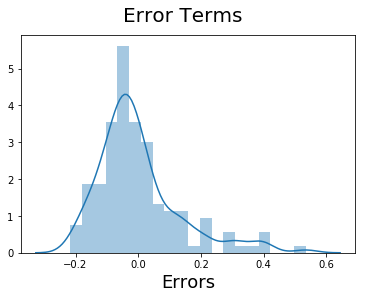

In [439]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

##### Observations:
- We can see the error are almost normally distributed
- The entries over 0.4 are showing a bit deviation.

# 9. Making Predictions

Let's now use the test set and predict the value using the model.

#### 9.1 Applying scaling to the test set

In [441]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['carwidth', 'enginesize', 'compressionratio', 'citympg', 'wheelbase','carheight','boreratio','horsepower','highwaympg','carlength','curbweight','stroke','peakrpm','price']

car_test[num_vars] = scaler.fit_transform(car_test[num_vars])

In [442]:
car_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mitsubishi,nissan,peugeot,plymouth,porsche,renault,subaru,toyota,volkswagen,volvo
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.0,61.000000,61.000000,61.000000,61.000000
mean,0.371648,0.483619,0.367213,0.435845,0.363681,0.227361,0.651965,0.661202,0.188260,0.336011,...,0.065574,0.081967,0.049180,0.065574,0.032787,0.0,0.032787,0.245902,0.016393,0.081967
std,0.181642,0.186567,0.214714,0.232967,0.230556,0.189940,0.222769,0.140293,0.238970,0.258433,...,0.249590,0.276591,0.218039,0.249590,0.179556,0.0,0.179556,0.434194,0.128037,0.276591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.379528,0.200000,0.250000,0.219125,0.126638,0.515873,0.590164,0.096774,0.112583,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.344023,0.485039,0.326316,0.451923,0.310428,0.187773,0.634921,0.666667,0.129032,0.271523,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.486880,0.612598,0.463158,0.586538,0.545411,0.270742,0.857143,0.759563,0.154839,0.397351,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### 9.2 Dividing into X and Y test set

In [ ]:
y_test = car_test.pop('price')

In [459]:
X_test = car_test
X_test.shape

(61, 76)

In [461]:
# Dropping constant
X_train_rfe_alt.drop(['const'], axis=1,inplace = True)

In [462]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_alt.columns]

In [463]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)

In [466]:
# Making predictions
y_pred = lm.predict(X_test_new)

# 10. Model Evaluation

Text(0, 0.5, 'y_pred')

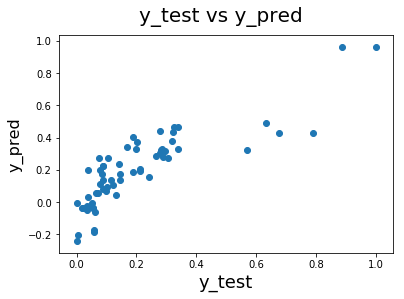

In [467]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ price = 0.2347  \times  aboreratio - 0.6536  \times  citympg - 0.1603 \times dohcv + 0.0560 \times ohc - 0.1239 \times rotor + 0.4355 \times eight + 0.2859 \times three + 0.4043 \times twelve + 0.0637 \times prefarea - 0.1510 \times spdi $

### Conclusion
- Overall a decent model.
- Lower values are predicted properly, higher values of 'price' show a bit of deviation.
- To overcome that, we may need to add more variables for regression
- It would also be more convinient to build a non-linear model